# Git Repository Stuff

In [1]:
!git config --global user.email "ltskar009@myuct.ac.za"

In [2]:
!git add .

In [3]:
!git submodule add <url> Data Techniques/Astronomical_Techniques

The system cannot find the file specified.


In [4]:
!git commit -m "Add Jupyter Notebook"

[main bcce351] Add Jupyter Notebook
 1 file changed, 148 insertions(+), 103 deletions(-)


In [5]:
!git push

To https://github.com/KaraboLetsholo/3rd-Year-Project-.git
   6023218..bcce351  main -> main


In [6]:
!git commit -m "selection criteria"

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   Code.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


# Importing Important Modules

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import sigmoid_kernel
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Conv1D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras import backend
from keras.layers import Dense
from keras.models import load_model, Sequential
from sklearn.metrics import roc_curve, auc
import keras as keras
from sklearn.metrics import confusion_matrix

# tWZ-ttZ

## Importing the data
The tWZ (signal) versus the ttZ (background) datafile is named 'tWZ+ttZ (1).csv' and is imported using the pandas 'read_csv()' function. The data has features and labels and the signal process (tWZ) has a label of 1 and the background process (ttZ) has a label of 0.

In [18]:
df1.shape

(20000, 50)

In [17]:
df1 = pd.read_csv('tWZ+ttZ (1).csv')#
X1 = df1.drop(['label'], axis=1)
y1 = df1['label']

X1 = X1[['mu_pt_2', 'mu_e_2', 'mu_pt_3', 'mu_e_3', 'mu_phi_2', 'Z_eta', 'mu_eta_2', 'mu_eta_1', 'jet_eta_1', 'jet_eta_3', 'mu_pt_1', 'mu_e_1', 'jet_eta_2', 'mu_phi_1', 'el_eta_1']]
#X1 = X1.drop(['delPhi_0_lep_MET','MET','num_jets','num_bjets','num_fake_leps','jet_pt_1','jet_pt_2','jet_pt_3','jet_phi_1','jet_phi_2','jet_phi_3','jet_eta_1','jet_eta_2','jet_eta_3','jet_e_1','jet_e_2','jet_e_3','jet_DL1r_1','jet_DL1r_2','jet_DL1r_3','el_pt_1','el_pt_2','el_pt_3','el_eta_1','el_eta_2','el_eta_3','el_phi_1','el_phi_2','el_phi_3','el_e_1','el_e_2','el_e_3'], axis=1)#	mu_pt_1	mu_pt_2	mu_pt_3	mu_eta_1	mu_eta_2	mu_eta_3	mu_phi_1	mu_phi_2	mu_phi_3	mu_e_1	mu_e_2	mu_e_3	label

## Splitting the dataset into training, testing and validation dataset with split (60,20,20)

In [58]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, train_size=0.75, test_size=0.25, shuffle=True)
#X1_test, X1_val, y1_test, y1_val = train_test_split(X1_test,y1_test, train_size=0.5, test_size=0.5, shuffle=True)

In [59]:
scaler1 = StandardScaler()
scaler_train1 = scaler1.fit(X1_train)
X1_train = scaler1.transform(X1_train)
scaler_test1 = scaler1.fit(X1_test)
X1_test = scaler1.transform(X1_test)
#scaler_val1 = scaler1.fit(X1_val)
#X1_val = scaler1.transform(X1_val)

## Defining the Model

In [60]:
callback = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.5,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

model = Sequential()
model.add(Dense(X1.shape[1], activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(int(X1.shape[1]/4), activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(int(X1.shape[1]/2), activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'mae'])
history1 = model.fit(X1_train, y1_train, epochs=20, validation_data=(X1_test, y1_test), callbacks=None)
model.summary()

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6246 - loss: 0.7137 - mae: 0.4820 - val_accuracy: 0.7672 - val_loss: 0.5774 - val_mae: 0.4184
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7365 - loss: 0.5572 - mae: 0.3869 - val_accuracy: 0.7908 - val_loss: 0.4522 - val_mae: 0.3201
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7555 - loss: 0.4853 - mae: 0.3307 - val_accuracy: 0.7950 - val_loss: 0.4389 - val_mae: 0.3059
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7615 - loss: 0.4688 - mae: 0.3192 - val_accuracy: 0.7952 - val_loss: 0.4365 - val_mae: 0.3026
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7701 - loss: 0.4558 - mae: 0.3115 - val_accuracy: 0.7948 - val_loss: 0.4357 - val_mae: 0.2981
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7926 - loss: 0.4418 - mae: 0.3001 - val_accuracy: 0.7952 - val_loss: 0.4347 - val_mae: 0.2939
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 15)                  │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │              48 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 3)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │              28 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 7)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 974 (3.81 KB)

 Trainable params: 324 (1.27 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 650 (2.54 KB)

In [6]:
y_pred1 = model.predict(X1_test)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [7]:
signal, bg0 = [],[]
j = 0
for index in y1_test.index:
    if y1_test[index] == 0:
        bg0.append(float(y_pred1[j][0]))
    else:
        signal.append(float(y_pred1[j][0]))
    j+=1

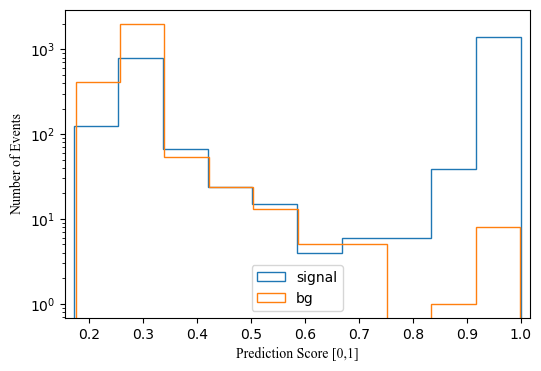

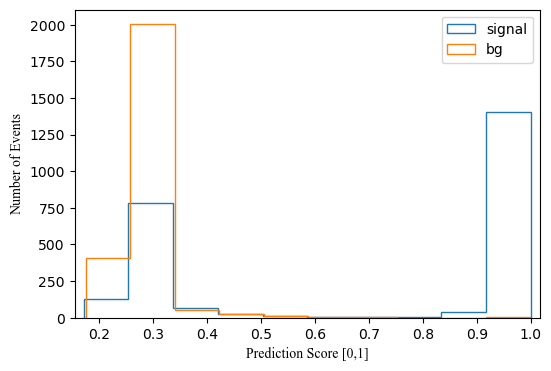

In [8]:
fig, ax1 = plt.subplots(1, figsize=(6,4))

plt.hist(signal, histtype='step', label='signal')
plt.hist(bg0, histtype='step', label='bg')
plt.yscale('log')
plt.legend()
plt.margins(x=0.02, y=None, tight=True)
plt.xlabel('Prediction Score [0,1]', font='Times New Roman')
plt.ylabel('Number of Events', font='Times New Roman')
plt.savefig('tWZ-ttZ-log')
plt.show()

fig, ax1 = plt.subplots(1, figsize=(6,4))


plt.hist(signal, histtype='step', label='signal')
plt.hist(bg0, histtype='step', label='bg')
plt.yscale('linear')
plt.legend()
plt.xlabel('Prediction Score [0,1]', font='Times New Roman')
plt.ylabel('Number of Events', font='Times New Roman')
plt.margins(x=0.02, y=None, tight=True)
plt.savefig('tWZ-ttZ')

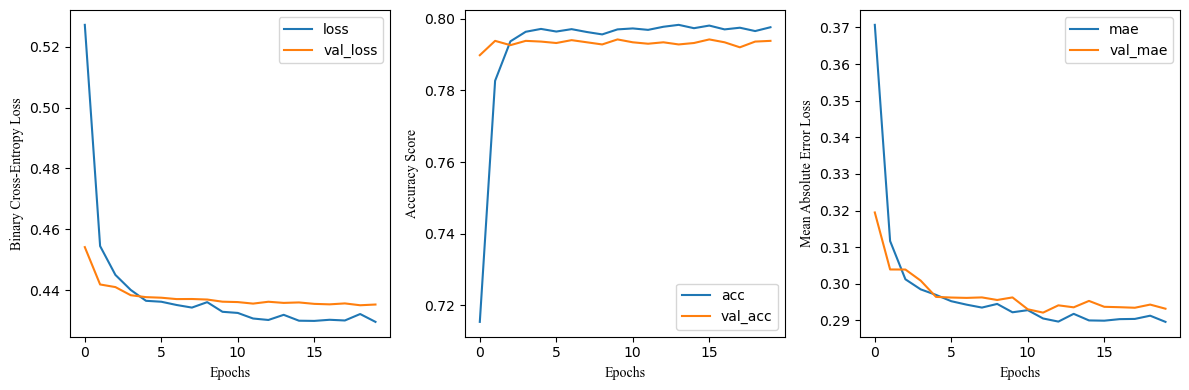

In [9]:
params1 = pd.DataFrame(history1.history)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,4))

ax1.plot(params1['loss'], label='loss')
ax1.plot(params1['val_loss'], label='val_loss')
ax1.legend()
ax2.plot(params1['accuracy'], label='acc')
ax2.plot(params1['val_accuracy'], label='val_acc')
ax2.legend()
ax3.plot(params1['mae'], label='mae')
ax3.plot(params1['val_mae'], label='val_mae')
ax3.legend()
ax2.set_xlabel("Epochs", font='Times New Roman')
ax3.set_xlabel("Epochs", font='Times New Roman')
ax1.set_xlabel("Epochs", font='Times New Roman')
ax1.set_ylabel("Binary Cross-Entropy Loss", font='Times New Roman')
ax2.set_ylabel("Accuracy Score", font='Times New Roman')
ax3.set_ylabel("Mean Absolute Error Loss", font='Times New Roman')
fig.tight_layout() 
plt.savefig("tWZ-ttZ-acc")

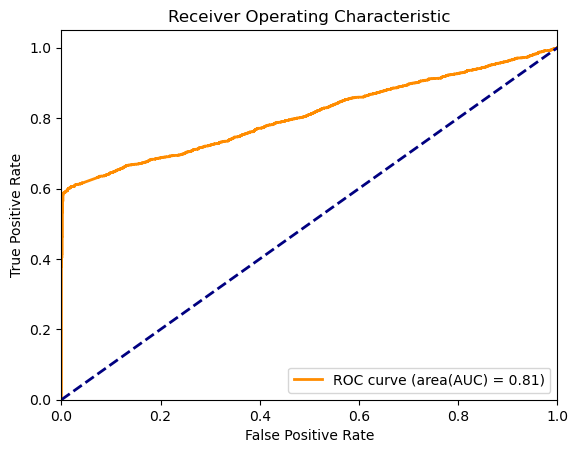

0.8074513826850305


In [10]:
fpr, tpr, _ = roc_curve(y1_test, y_pred1)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area(AUC) = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC-AUC-Curves')
plt.show()
print(roc_auc)

# ttZ-vs-Background Classification

## Importing the data
The tWZ (signal) versus the ttZ (background) datafile is named 'tWZ+ttZ (1).csv' and is imported using the pandas 'read_csv()' function. The data has features and labels and the signal process (tWZ) has a label of 1 and the background process (ttZ) has a label of 0.

In [2]:
df2 = pd.read_csv('ttZ+bkg.csv')#
X2 = df2.drop(['label'], axis=1)
y2 = df2['label']
X2 = X2[['el_pt_2', 'el_e_2', 'el_eta_2', 'el_phi_2', 'el_eta_1', 'el_pt_1', 'el_e_1', 'el_phi_1', 'el_pt_3', 'el_e_3', 'jet_eta_2', 'jet_eta_1', 'Z_eta', 'jet_eta_3', 'el_eta_3']]
#X2[['el_pt_2', 'el_e_2', 'el_eta_2', 'el_phi_2', 'el_eta_1', 'el_pt_1', 'el_e_1', 'el_phi_1', 'el_pt_3', 'el_e_3', 'jet_eta_2', 'jet_eta_1', 'Z_eta', 'jet_eta_3', 'el_eta_3']]
#X2[['el_pt_2', 'el_e_2', 'el_eta_2', 'el_phi_2', 'el_eta_1', 'el_pt_1', 'el_e_1', 'el_phi_1', 'el_pt_3', 'el_e_3']]
#X2[['jet_DL1r_1','jet_DL1r_2','delPhi_0_lep_MET','el_phi_3','el_eta_2','jet_eta_2','Z_phi','Z_eta','jet_eta_1','el_phi_1']]
#X2 = X2.drop(['delPhi_0_lep_MET','MET','num_jets','num_bjets','jet_pt_1','jet_pt_2','jet_pt_3','jet_phi_1','jet_phi_2','jet_phi_3','jet_eta_1','jet_eta_2','jet_eta_3','jet_e_1','jet_e_2','jet_e_3','jet_DL1r_1','jet_DL1r_2','jet_DL1r_3','el_pt_1','el_pt_2','el_pt_3','el_eta_1','el_eta_2','el_eta_3','el_phi_1','el_phi_2','el_phi_3','el_e_1','el_e_2','el_e_3'], axis=1)#,'mu_pt_1',mu_pt_2	mu_pt_3	mu_eta_1	mu_eta_2	mu_eta_3	mu_phi_1	mu_phi_2	mu_phi_3	mu_e_1	mu_e_2	mu_e_3	label

## Splitting the dataset into training, testing and validation dataset with split (60,20,20)

In [3]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, train_size=0.6, test_size=0.4, shuffle=True)
X2_test, X2_val, y2_test, y2_val = train_test_split(X2_test,y2_test, train_size=0.5, test_size=0.5, shuffle=True)

In [4]:
scaler2 = StandardScaler()
scaler_train2 = scaler2.fit(X2_train)
X2_train = scaler2.transform(X2_train)
scaler_test = scaler2.fit(X2_test)
X2_test = scaler2.transform(X2_test)
scaler_val2 = scaler2.fit(X2_val)
X2_val = scaler2.transform(X2_val)

## Defining the Model

In [5]:
callback = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.5,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

model = Sequential()
model.add(Dense(X2.shape[1], activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(X2.shape[1], activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(X2.shape[1], activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(X2.shape[1], activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'mae'])
history2 = model.fit(X2_train, y2_train, epochs=20, validation_data=(X2_val, y2_val), callbacks=None)
model.summary()

Epoch 1/20
376/376 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6833 - loss: 0.5985 - mae: 0.4223 - val_accuracy: 0.7758 - val_loss: 0.4607 - val_mae: 0.3213
Epoch 2/20
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7685 - loss: 0.4715 - mae: 0.3234 - val_accuracy: 0.7908 - val_loss: 0.4316 - val_mae: 0.2941
Epoch 3/20
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7922 - loss: 0.4444 - mae: 0.2983 - val_accuracy: 0.7998 - val_loss: 0.4230 - val_mae: 0.2898
Epoch 4/20
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7939 - loss: 0.4410 - mae: 0.2963 - val_accuracy: 0.8033 - val_loss: 0.4196 - val_mae: 0.2765
Epoch 5/20
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7986 - loss: 0.4271 - mae: 0.2836 - val_accuracy: 0.8020 - val_loss: 0.4166 - val_mae: 0.2813
Epoch 6/20
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8054 - loss: 0.4261 - mae: 0.2830 - val_accuracy: 0.8035 - val_loss: 0.4142 - val_mae: 0.2835
Epoch 7/20
376/376 ━━━━━━━━━━━━━━━━━━━━ 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 15)                  │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 15)                  │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 15)                  │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 15)                  │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,930 (11.45 KB)

 Trainable params: 976 (3.81 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,954 (7.64 KB)

In [6]:
y_pred2 = model.predict(X2_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [7]:
bg1, bg2 = [],[]
j = 0
for index in y2_test.index:
    if y2_test[index] == 0:
        bg2.append(float(y_pred2[j][0]))
    else:
        bg1.append(float(y_pred2[j][0]))
    j+=1

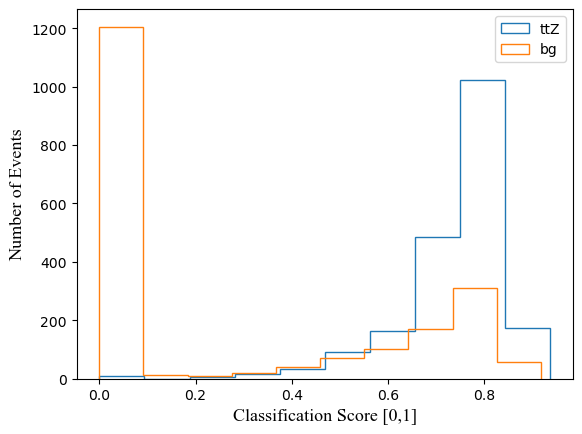

In [14]:
plt.hist(bg1, histtype='step', label='ttZ')
plt.hist(bg2, histtype='step', label='bg')
plt.ylabel("Number of Events", font='Times New Roman', fontsize=13)
plt.xlabel("Classification Score [0,1]", font='Times New Roman', fontsize=13)
#plt.yscale('log')
plt.legend()
plt.savefig('ttZ')

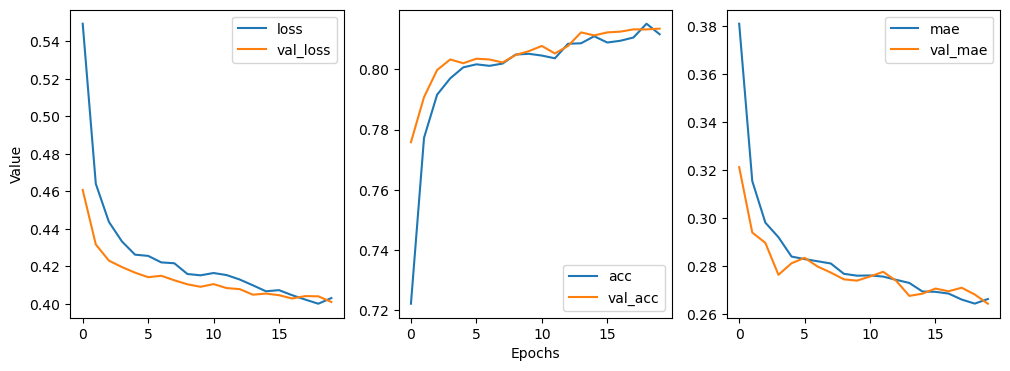

In [15]:
params2 = pd.DataFrame(history2.history)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,4))

ax1.plot(params2['loss'], label='loss')
ax1.plot(params2['val_loss'], label='val_loss')
ax1.legend()
ax2.plot(params2['accuracy'], label='acc')
ax2.plot(params2['val_accuracy'], label='val_acc')
ax2.legend()
ax3.plot(params2['mae'], label='mae')
ax3.plot(params2['val_mae'], label='val_mae')
ax3.legend()
ax2.set_xlabel("Epochs")
ax1.set_ylabel("Value")
plt.savefig('ttZ-loss')

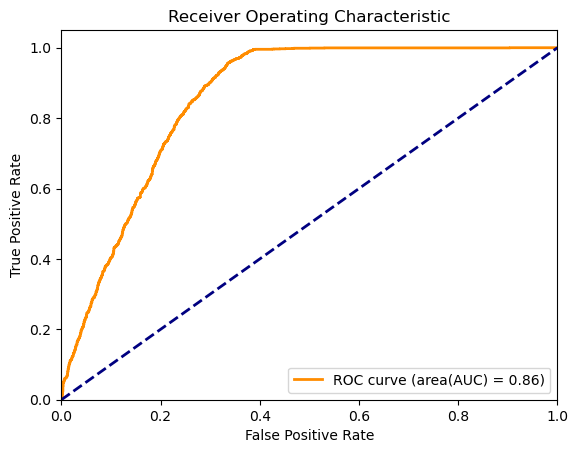

0.8552976744197673


In [16]:
fpr, tpr, _ = roc_curve(y2_test, y_pred2)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area(AUC) = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC-AUC-Curves-ttZ')
plt.show()
print(roc_auc)

# tWZ -vs- All Background

## Importing the data
The tWZ (signal) versus the ttZ (background) datafile is named 'tWZ+ttZ (1).csv' and is imported using the pandas 'read_csv()' function. The data has features and labels and the signal process (tWZ) has a label of 1 and the background process (ttZ) has a label of 0.

In [38]:
df0, df_ = pd.read_csv('ttZ+bkg.csv'), pd.read_csv('tWZ+ttZ (1).csv')#
df = pd.concat([df0, df_])
df = df.dropna()
#df = df.drop(['num_fake_leps','delPhi_0_lep_MET','MET','num_jets','num_bjets','jet_pt_1','jet_pt_2','jet_pt_3','jet_phi_1','jet_phi_2','jet_phi_3','jet_eta_1','jet_eta_2','jet_eta_3','jet_e_1','jet_e_2','jet_e_3','jet_DL1r_1','jet_DL1r_2','jet_DL1r_3','el_pt_1','el_pt_2','el_pt_3','el_eta_1','el_eta_2','el_eta_3','el_phi_1','el_phi_2','el_phi_3','el_e_1','el_e_2','el_e_3'], axis=1)#,'mu_pt_1',mu_pt_2	mu_pt_3	mu_eta_1	mu_eta_2	mu_eta_3	mu_phi_1	mu_phi_2	mu_phi_3	mu_e_1	mu_e_2	mu_e_3	label
X = df.drop(['label'], axis=1)
y = df['label']

X = X[['mu_pt_2', 'mu_e_2', 'mu_pt_3', 'mu_e_3', 'mu_phi_2', 'Z_eta', 'mu_eta_2', 'mu_eta_1', 'jet_eta_1', 'jet_eta_3', 'mu_pt_1', 'mu_e_1', 'jet_eta_2', 'mu_phi_1', 'el_eta_1']]

## Splitting the dataset into training, testing and validation dataset with split (60,20,20)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.6, test_size=0.4, shuffle=True)
X_test, X_val, y_test, y_val = train_test_split(X_test,y_test, train_size=0.5, test_size=0.5, shuffle=True)

In [40]:
scaler = StandardScaler()
scaler_train = scaler.fit(X_train)
X_train = scaler.transform(X_train)
scaler_test = scaler.fit(X_test)
X_test = scaler.transform(X_test)
scaler_val = scaler2.fit(X_val)
X_val = scaler.transform(X_val)

## Defining the Model

In [41]:
"""callback = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

model0 = Sequential()
model0.add(Dense(30, activation='relu'))
model0.add(Dense(40, activation='relu'))
model0.add(Dense(10, activation='relu'))
model0.add(Dense(1, activation='sigmoid'))
model0.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'mae'])"""
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), callbacks=None)
model.summary()

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7145 - loss: 0.5510 - mae: 0.3654 - val_accuracy: 0.7972 - val_loss: 0.4324 - val_mae: 0.2921
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7896 - loss: 0.4485 - mae: 0.3023 - val_accuracy: 0.7990 - val_loss: 0.4273 - val_mae: 0.2932
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8027 - loss: 0.4291 - mae: 0.2877 - val_accuracy: 0.7993 - val_loss: 0.4262 - val_mae: 0.2940
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7934 - loss: 0.4421 - mae: 0.2983 - val_accuracy: 0.7995 - val_loss: 0.4269 - val_mae: 0.2958
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7897 - loss: 0.4412 - mae: 0.2993 - val_accuracy: 0.7987 - val_loss: 0.4256 - val_mae: 0.2891
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7886 - loss: 0.4417 - mae: 0.2976 - val_accuracy: 0.7977 - val_loss: 0.4268 - val_mae: 0.2841
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 15)                  │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 15)                  │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 15)                  │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 15)                  │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,930 (11.45 KB)

 Trainable params: 976 (3.81 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,954 (7.64 KB)

In [42]:
y_pred = model.predict(X_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [43]:
signal, bg = [],[]
j = 0
for index in y_test.index:
    if y_test[index] == 0:
        bg.append(float(y_pred[j][0]))
    else:
        signal.append(float(y_pred[j][0]))
    j+=1

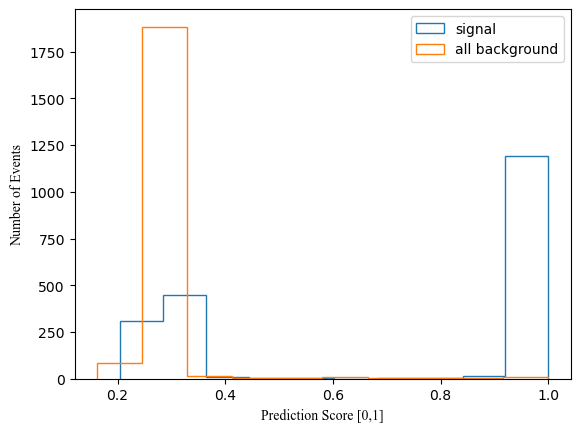

In [50]:
plt.hist(signal, histtype='step', label='signal')
plt.hist(bg, histtype='step', label='all background')
plt.yscale('linear')
plt.xlabel('Prediction Score [0,1]', font='Times New Roman')
plt.ylabel('Number of Events', font='Times New Roman')
plt.savefig('tWZ-All_bg')
plt.legend()

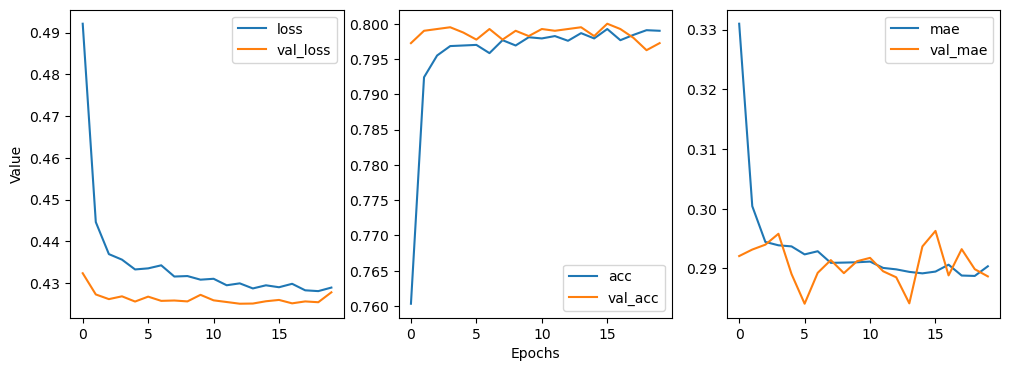

In [51]:
params = pd.DataFrame(history.history)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,4))

ax1.plot(params['loss'], label='loss')
ax1.plot(params['val_loss'], label='val_loss')
ax1.legend()
ax2.plot(params['accuracy'], label='acc')
ax2.plot(params['val_accuracy'], label='val_acc')
ax2.legend()
ax3.plot(params['mae'], label='mae')
ax3.plot(params['val_mae'], label='val_mae')
ax3.legend()
ax2.set_xlabel("Epochs")
ax1.set_ylabel("Value")
plt.savefig("tWZ_All_bg_acc")

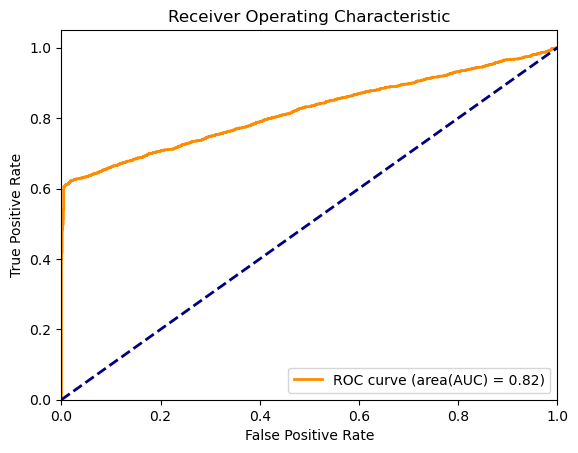

0.8195825023607247


In [52]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area(AUC) = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC-AUC-Curves-tWZ_bg')
plt.show()
print(roc_auc)

# Selection Criteria for tWZ-ttZ

In [11]:
data = pd.read_csv('tWZ+ttZ (1).csv')
signal = data[data['label'] == 1]
bg = data[data['label'] == 0]

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss

# Assuming df is your DataFrame with 49 features and 'label' as the binary target
df = data
features = df.columns[:-1]
label = df['label']

"""
# Step 1: Analyze Distributions
for feature in features:
    plt.figure(figsize=(10, 4))
    df[df['label'] == 0][feature].hist(alpha=0.5, label='0')
    df[df['label'] == 1][feature].hist(alpha=0.5, label='1')
    plt.title(f'Distribution of {feature}')
    plt.legend()
    plt.show()"""

# Step 2: Calculate Binary Cross Entropy
bce_scores = {}
for feature in features:
    bce = log_loss(label, df[feature])
    bce_scores[feature] = bce

# Step 3: Feature Selection
selected_features = sorted(bce_scores, key=bce_scores.get)[:15]
print("Selected Features:", selected_features)


Selected Features: ['mu_pt_2', 'mu_e_2', 'mu_pt_3', 'mu_e_3', 'mu_phi_2', 'Z_eta', 'mu_eta_2', 'mu_eta_1', 'jet_eta_1', 'jet_eta_3', 'mu_pt_1', 'mu_e_1', 'jet_eta_2', 'mu_phi_1', 'el_eta_1']


In [13]:
bce_scores

{'Unnamed: 0': 18.021826694558573,
 'Z_pt': 18.021826694558573,
 'Z_mass': 18.021826694558573,
 'Z_phi': 15.282329772025667,
 'Z_eta': 12.636124031759929,
 'delPhi_0_lep_MET': 16.28332218304476,
 'MET': 18.016639797830052,
 'num_jets': 18.021826694558573,
 'num_bjets': 18.021826694558573,
 'num_fake_leps': 18.02362887722803,
 'jet_pt_1': 18.021826694558573,
 'jet_pt_2': 18.021826694558573,
 'jet_pt_3': 18.021826694558573,
 'jet_phi_1': 15.28195203896979,
 'jet_phi_2': 15.421111906355232,
 'jet_phi_3': 15.30668013682832,
 'jet_eta_1': 13.111225028306668,
 'jet_eta_2': 13.455836983103993,
 'jet_eta_3': 13.3256071036845,
 'jet_e_1': 18.021826694558573,
 'jet_e_2': 18.021826694558573,
 'jet_e_3': 18.021826694558573,
 'jet_DL1r_1': 17.072242104169536,
 'jet_DL1r_2': 17.351186175108722,
 'jet_DL1r_3': 17.682035812429937,
 'el_pt_1': 23.66626281529432,
 'el_pt_2': 28.755626673837657,
 'el_pt_3': 22.684073260440876,
 'el_eta_1': 14.613048674193957,
 'el_eta_2': 17.525863172617367,
 'el_eta_3':

In [14]:
df_bce_scores = pd.DataFrame(list(bce_scores.items()), columns=['Feature', 'BCE_Score'])

print(df_bce_scores)

             Feature  BCE_Score
0         Unnamed: 0  18.021827
1               Z_pt  18.021827
2             Z_mass  18.021827
3              Z_phi  15.282330
4              Z_eta  12.636124
5   delPhi_0_lep_MET  16.283322
6                MET  18.016640
7           num_jets  18.021827
8          num_bjets  18.021827
9      num_fake_leps  18.023629
10          jet_pt_1  18.021827
11          jet_pt_2  18.021827
12          jet_pt_3  18.021827
13         jet_phi_1  15.281952
14         jet_phi_2  15.421112
15         jet_phi_3  15.306680
16         jet_eta_1  13.111225
17         jet_eta_2  13.455837
18         jet_eta_3  13.325607
19           jet_e_1  18.021827
20           jet_e_2  18.021827
21           jet_e_3  18.021827
22        jet_DL1r_1  17.072242
23        jet_DL1r_2  17.351186
24        jet_DL1r_3  17.682036
25           el_pt_1  23.666263
26           el_pt_2  28.755627
27           el_pt_3  22.684073
28          el_eta_1  14.613049
29          el_eta_2  17.525863
30      

In [15]:
df_bce_scores.to_csv('bce_scores_tWZ.csv', index=False)

# Selection Criteria for ttZ-Bg

In [20]:
data = pd.read_csv('ttz+bkg.csv')
signal = data[data['label'] == 1]
bg = data[data['label'] == 0]

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss

# Assuming df is your DataFrame with 49 features and 'label' as the binary target
df = data
features = df.columns[:-1]
label = df['label']

"""
# Step 1: Analyze Distributions
for feature in features:
    plt.figure(figsize=(10, 4))
    df[df['label'] == 0][feature].hist(alpha=0.5, label='0')
    df[df['label'] == 1][feature].hist(alpha=0.5, label='1')
    plt.title(f'Distribution of {feature}')
    plt.legend()
    plt.show()"""

# Step 2: Calculate Binary Cross Entropy
bce_scores = {}
for feature in features:
    bce = log_loss(label, df[feature])
    bce_scores[feature] = bce

# Step 3: Feature Selection
selected_features = sorted(bce_scores, key=bce_scores.get)[:15]
print("Selected Features:", selected_features)


Selected Features: ['el_pt_2', 'el_e_2', 'el_eta_2', 'el_phi_2', 'el_eta_1', 'el_pt_1', 'el_e_1', 'el_phi_1', 'el_pt_3', 'el_e_3', 'jet_eta_2', 'jet_eta_1', 'Z_eta', 'jet_eta_3', 'el_eta_3']


In [22]:
df_bce_scores = pd.DataFrame(list(bce_scores.items()), columns=['Feature', 'BCE_Score'])

In [23]:
df_bce_scores.to_csv('bce_scores_ttZ.csv', index=False)

# tWZ versus All Background

In [30]:
data1 = pd.read_csv('tWZ+ttZ (1).csv')
data2 = pd.read_csv('ttz+bkg.csv')
data = pd.concat([data1, data2])
data = data.dropna()
signal = data[data['label'] == 1]
bg = data[data['label'] == 0]
signal = data[data['label'] == 1]
bg = data[data['label'] == 0]
signal.shape

(10000, 50)

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss

# Assuming df is your DataFrame with 49 features and 'label' as the binary target
df = data
features = df.columns[:-1]
label = df['label']

"""
# Step 1: Analyze Distributions
for feature in features:
    plt.figure(figsize=(10, 4))
    df[df['label'] == 0][feature].hist(alpha=0.5, label='0')
    df[df['label'] == 1][feature].hist(alpha=0.5, label='1')
    plt.title(f'Distribution of {feature}')
    plt.legend()
    plt.show()"""

# Step 2: Calculate Binary Cross Entropy
bce_scores = {}
for feature in features:
    bce = log_loss(label, df[feature])
    bce_scores[feature] = bce

# Step 3: Feature Selection
selected_features = sorted(bce_scores, key=bce_scores.get)[:15]
print("Selected Features:", selected_features)

Selected Features: ['mu_pt_2', 'mu_e_2', 'mu_pt_3', 'mu_e_3', 'mu_phi_2', 'Z_eta', 'mu_eta_2', 'mu_eta_1', 'jet_eta_1', 'jet_eta_3', 'mu_pt_1', 'mu_e_1', 'jet_eta_2', 'mu_phi_1', 'el_eta_1']


In [32]:
df_bce_scores = pd.DataFrame(list(bce_scores.items()), columns=['Feature', 'BCE_Score'])

In [34]:
df_bce_scores.to_csv('bce_scores_tWZ_all_bg.csv', index=False)

# Decision Boundaries